In [ ]:
#네이버 뉴스 크롤링파일 csv 읽어오기

In [173]:
import pandas as pd
df1 = pd.read_csv('naver_news_scraping_ranking_0120_0831.csv')

In [191]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [174]:
df_counts = df1['view']

In [175]:
df1

,Unnamed: 0,date,section,title,view
0,0,20200120,politics,"한국당, 불교계 선물로 보낸 '육포' 긴급 회수…""잘못 배달""",211310
1,1,20200120,politics,불교계 설선물로 '육포' 보낸 한국당…긴급 회수 소동,160495
2,2,20200120,politics,"대한민굴→대한민국…안철수, 현충원 방명록에 남은 '오자 흔적'",129836
3,3,20200120,politics,"""다른 절엔 한과 보냈는데""···한국당 '조계종 육포' 사건 전말",94315
4,4,20200120,politics,"한국이름쓰고, 테러에도 의연했던 전임자와는 너무 다른 해리스",88093
...,...,...,...,...,...
20245,20245,20200831,Society,"[속보] 확진자 5명 연산동 오피스텔 왜 갔나 ""주식 공부·지인 만남…",167826
20246,20246,20200831,Society,“의대 정원 늘리는 데 의사 ‘허락’ 받는 게 옳은 일일까요?”,165732
20247,20247,20200831,Society,[속보] 영등포 권능교회 예배 참석 32명 중 16명 확진…15명 검사중,163914
20248,20248,20200831,Society,고스톱 치다 ‘코로나 날벼락’,163157


In [176]:
df_counts.mean()

148076.9285925926

In [177]:
criteria = df_counts.quantile(q=0.98, interpolation='nearest') #상위 2프로의 뷰 숫자 
criteria

424231

In [178]:
df_filter_view = df1[df1.view>=criteria] #상위 2프로의 뷰숫자 기준으로 큰값만 남겨둔다.

In [192]:
df_filter_view

,Unnamed: 0,date,section,title,view
60,60,20200120,Society,‘故신격호 사실혼’ 배우 서미경 조문… 파란만장했던 사연들,500618
150,150,20200121,Society,성산대교서 SUV 난간 뚫고 추락…40대 운전자 사망(종합),495473
240,240,20200122,Society,장지연 향한 복수?… “배우와 동거했다더라” 사생활 떠벌린 가세연,448660
600,600,20200126,Society,"장충동 호텔서 불···""안내 못받아, 中관광객 아니면 다 죽었다""",660734
690,690,20200127,Society,"대법, 이부진 부부 이혼 확정…""임우재에 141억원 지급""",515507
...,...,...,...,...,...
20160,20160,20200831,politics,"""유사시 北에 남한 의사 파견한다"" 발칵 뒤집은 민주당 법안",723426
20161,20161,20200831,politics,"조은산, 림태주에 반격 ""2000만 백성 짓밟는 게 정의냐"" [전문]",549187
20220,20220,20200831,Society,[단독] 꽃보다 ‘생명’…쓰러진 주방장 응급처치하고 떠난 김현중,791163
20221,20221,20200831,Society,"파업, 이쯤에서 끝냅시다",485216


In [ ]:
#위의 상위 2프로 조회수 이상의 뉴스들을 섹션별로 나눈다 (정치,경제, 사회)
#정치영역 조회수 상위권 뉴스

In [181]:
df_filter_section_politics = df_filter_view[df_filter_view.section=='politics']

In [223]:
print(len(df_filter_section_politics))
df_filter_section_politics_sort =df_filter_section_politics.sort_values('view',ascending=False)
# df_filter_section_politics_sort.head(20)
df_filter_section_politics_sort.to_csv("./정치영역.csv")

63


In [ ]:
#경재영역 조회수 상위권 뉴스

In [187]:
df_filter_section_economy= df_filter_view[df_filter_view.section=='economy']

In [225]:
print(len(df_filter_section_economy))
df_filter_section_economy
df_filter_section_economy_sort =df_filter_section_economy.sort_values('view',ascending=False)
df_filter_section_economy_sort.head(20)
df_filter_section_economy_sort.to_csv("./경제영역.csv")

51


In [ ]:
#사회 영역 조회수 상위권 뉴스

In [189]:
df_filter_section_society=df_filter_view[df_filter_view.section=='Society']

In [227]:
print(len(df_filter_section_society))
df_filter_section_society
df_filter_section_society_sort =df_filter_section_society.sort_values('view',ascending=False)
df_filter_section_society_sort.head(20)
df_filter_section_society_sort.to_csv("./사회영역.csv")

292


In [42]:
# 청와대 뉴스 크롤링 파일 불러오기

In [232]:
df2 = pd.read_csv('naver_news_264.csv')

In [235]:
df2['count'].mean()

194.88383709016392

In [236]:
df2_counts= df2['count']

In [243]:
criteria2 = df2_counts.quantile(q=0.995, interpolation='nearest') #상위 0.5프로 
criteria2

6038

In [251]:
df_filter_view2 = df2[df2['count'] >= criteria2]
df_filter_view2_sort =df_filter_view2.sort_values('count',ascending=False)
df_filter_view2_sort

,Unnamed: 0,date,title,url,count
1139,1139,20200201,[단독] 대통령 측근·친인척 비위 막는 청와대 특별감찰관 폐지 추진,https://news.naver.com/main/read.nhn?mode=LS2D...,25908
1189,1189,20200203,"文대통령 ""중국 어려움이 우리 어려움… 지원 아끼지 말아야""",https://news.naver.com/main/read.nhn?mode=LS2D...,25764
5282,1045,20200309,"文대통령 ""확진자 이대로 계속 줄면 한국은 방역 모범사례""",https://news.naver.com/main/read.nhn?mode=LS2D...,23775
1605,1605,20200206,"文대통령, 이와중에 수백명 모이는 부산 행사에 마스크 쓰고 참석",https://news.naver.com/main/read.nhn?mode=LS2D...,22486
3159,3159,20200220,"文대통령, '기생충'팀 靑 초청 오찬… 김정숙 여사가 만든 '짜파구리'도 나와",https://news.naver.com/main/read.nhn?mode=LS2D...,22430
...,...,...,...,...,...
2493,2493,20200213,"文대통령 ""스쳐지나가선 감염 안돼..국민들 다시 활동해주길""",https://news.naver.com/main/read.nhn?mode=LS2D...,6185
1184,1184,20200203,"문 대통령 ""이제 시작일지 모른다…경제보다 국민 안전에 우선""",https://news.naver.com/main/read.nhn?mode=LS2D...,6145
7668,3431,20200331,"文대통령 ""해외 입국자, 작은 구멍이 둑 무너뜨리는 법""",https://news.naver.com/main/read.nhn?mode=LS2D...,6133
16948,279,20200702,文 '지지율 50%' 깨졌다…민주당·통합당 격차 한자리수로,https://news.naver.com/main/read.nhn?mode=LS2D...,6127


In [228]:
df_filter_view2.to_csv("./청와대.csv")

In [86]:
#감염자 추이

In [159]:
df3 = pd.read_csv('Time.csv')

In [160]:
df3['re_date'] = df3.date

In [161]:
df3

,date,time,test,negative,confirmed,released,deceased,re_date
0,2020-01-20,16.0,1.0,0.0,1.0,0.0,0.0,2020-01-20
1,2020-01-21,16.0,1.0,0.0,1.0,0.0,0.0,2020-01-21
2,2020-01-22,16.0,4.0,3.0,1.0,0.0,0.0,2020-01-22
3,2020-01-23,16.0,22.0,21.0,1.0,0.0,0.0,2020-01-23
4,2020-01-24,16.0,27.0,25.0,2.0,0.0,0.0,2020-01-24
...,...,...,...,...,...,...,...,...
220,2020-08-27,0.0,1869579.0,1798832.0,18706.0,14461.0,313.0,2020-08-27
221,2020-08-28,0.0,1887717.0,1817929.0,19077.0,14551.0,316.0,2020-08-28
222,2020-08-29,0.0,1909329.0,1835883.0,19400.0,14765.0,321.0,2020-08-29
223,2020-08-30,0.0,1924170.0,1846450.0,19699.0,14903.0,323.0,2020-08-30


In [411]:
#정규표현식으로 date 형식 맞춰준다.
import re
# pd.options.mode.chained_assignment = None
for i,j in zip(df3['date'],range(len(df3)+1)):
    parse = re.sub('[-=.#/?:$}]', '', i)
    df3['re_date'][j] = int(parse)
df3

,date,time,test,negative,confirmed,released,deceased,re_date
0,20200120,16.0,1.0,0.0,1.0,0.0,0.0,20200120
1,20200121,16.0,1.0,0.0,1.0,0.0,0.0,20200121
2,20200122,16.0,4.0,3.0,1.0,0.0,0.0,20200122
3,20200123,16.0,22.0,21.0,1.0,0.0,0.0,20200123
4,20200124,16.0,27.0,25.0,2.0,0.0,0.0,20200124
...,...,...,...,...,...,...,...,...
220,20200827,0.0,1869579.0,1798832.0,18706.0,14461.0,313.0,20200827
221,20200828,0.0,1887717.0,1817929.0,19077.0,14551.0,316.0,20200828
222,20200829,0.0,1909329.0,1835883.0,19400.0,14765.0,321.0,20200829
223,20200830,0.0,1924170.0,1846450.0,19699.0,14903.0,323.0,20200830


In [412]:
df3['date'] = df3['re_date']
df3

,date,time,test,negative,confirmed,released,deceased,re_date
0,20200120,16.0,1.0,0.0,1.0,0.0,0.0,20200120
1,20200121,16.0,1.0,0.0,1.0,0.0,0.0,20200121
2,20200122,16.0,4.0,3.0,1.0,0.0,0.0,20200122
3,20200123,16.0,22.0,21.0,1.0,0.0,0.0,20200123
4,20200124,16.0,27.0,25.0,2.0,0.0,0.0,20200124
...,...,...,...,...,...,...,...,...
220,20200827,0.0,1869579.0,1798832.0,18706.0,14461.0,313.0,20200827
221,20200828,0.0,1887717.0,1817929.0,19077.0,14551.0,316.0,20200828
222,20200829,0.0,1909329.0,1835883.0,19400.0,14765.0,321.0,20200829
223,20200830,0.0,1924170.0,1846450.0,19699.0,14903.0,323.0,20200830


In [413]:
confirmed = df3[['date','confirmed']]
confirmed

,date,confirmed
0,20200120,1.0
1,20200121,1.0
2,20200122,1.0
3,20200123,1.0
4,20200124,2.0
...,...,...
220,20200827,18706.0
221,20200828,19077.0
222,20200829,19400.0
223,20200830,19699.0


In [389]:
confirmed.to_csv("./확진자.csv")

### 정제된 데이터변수 명
#### df_filter_view2_sort (청와대)
#### df_filter_section_society_sort(사회)
#### df_filter_section_economy_sort(경재)
#### df_filter_section_politics_sort(정치)
#### confirmed(확진자)

In [490]:
#뉴스에 따른 확진자 숫자 양상변화 함수
def confirmed_num(n):
    for i in range(len(confirmed)-6):
        if confirmed.date[i] == n:
#             print(confirmed.confirmed[i+6]-confirmed.confirmed[i])
            return confirmed.confirmed[i+6] - confirmed.confirmed[i]
            break
            return None
        else:
            continue
# confirmed_num(20200220)           

In [491]:
df_filter_section_politics_sort.head(10)

,Unnamed: 0,date,section,title,view,change_count
6390,6390,20200331,politics,"정 총리 ""4월 9일부터 순차 온라인 개학…등교는 연기""(종합)",1222359,498.0
15390,15390,20200709,politics,"박원순 연락두절…딸 ""유언 같은 말 남기고 휴대폰 꺼졌다""",1033669,258.0
3330,3330,20200226,politics,“중국 대통령 보는 것 같다” ‘문재인 탄핵’ 청원 50만 돌파,871961,3551.0
6300,6300,20200330,politics,[단독] 4월 6일 고3 또는 고교부터 ‘온라인 개학’ 할 듯,867050,576.0
3690,3690,20200301,politics,대구 내려간 '의사' 안철수 부부…방호복 입고 진료 자원봉사(종합),751691,3031.0
15480,15480,20200710,politics,"[단독] 박원순, 실종 당일 정세균에게 ""너무 힘들다. 죄송하다""",749700,274.0
20160,20160,20200831,politics,"""유사시 北에 남한 의사 파견한다"" 발칵 뒤집은 민주당 법안",723426,NaN
8370,8370,20200422,politics,"[단독]정부당국 ""김정은, 강원도 별장 머물며 비공개 현지지도""",721943,58.0
3960,3960,20200304,politics,"의사인 이낙연 아들 ""코로나는 코로 나온다"" 실언 논란",673516,2185.0
15750,15750,20200713,politics,"""이순신도 관노와 잠자리""…’미투’ 그녀는 홀로 떨고 있다",673036,271.0


In [492]:
#기사가 난 이후 6일간의 확진자수 변화량을 change에 저장
change = []
for i in df_filter_section_politics_sort.date:
    change.append(confirmed_num(i))
print(change)    

[498.0, 258.0, 3551.0, 576.0, 3031.0, 274.0, None, 58.0, 2185.0, 271.0, 11.0, 274.0, 3235.0, 92.0, None, 624.0, 444.0, 283.0, None, 573.0, None, 2922.0, 576.0, 57.0, 1887.0, 274.0, 57.0, 2922.0, 81.0, 186.0, 3235.0, 802.0, 110.0, 1887.0, 273.0, 163.0, 130.0, 576.0, 258.0, 3562.0, 266.0, 300.0, 191.0, None, 42.0, None, 1919.0, 744.0, 11.0, 1919.0, 209.0, 274.0, 576.0, 952.0, 267.0, 141.0, 42.0, 2922.0, 692.0, 2185.0, 2548.0, 441.0, 36.0]


In [493]:
#저장된 변화량을 새로운 컬렴 change_count 에 저장한다.  nan은 확진자 데이터가 8월 31일까지 이므로 8월25일부터는 변화량추이를 넣지않고 nan값을둔다.
df_filter_section_politics_sort['change_count'] = change

In [494]:
df_filter_section_politics_sort.head(10)

,Unnamed: 0,date,section,title,view,change_count
6390,6390,20200331,politics,"정 총리 ""4월 9일부터 순차 온라인 개학…등교는 연기""(종합)",1222359,498.0
15390,15390,20200709,politics,"박원순 연락두절…딸 ""유언 같은 말 남기고 휴대폰 꺼졌다""",1033669,258.0
3330,3330,20200226,politics,“중국 대통령 보는 것 같다” ‘문재인 탄핵’ 청원 50만 돌파,871961,3551.0
6300,6300,20200330,politics,[단독] 4월 6일 고3 또는 고교부터 ‘온라인 개학’ 할 듯,867050,576.0
3690,3690,20200301,politics,대구 내려간 '의사' 안철수 부부…방호복 입고 진료 자원봉사(종합),751691,3031.0
15480,15480,20200710,politics,"[단독] 박원순, 실종 당일 정세균에게 ""너무 힘들다. 죄송하다""",749700,274.0
20160,20160,20200831,politics,"""유사시 北에 남한 의사 파견한다"" 발칵 뒤집은 민주당 법안",723426,NaN
8370,8370,20200422,politics,"[단독]정부당국 ""김정은, 강원도 별장 머물며 비공개 현지지도""",721943,58.0
3960,3960,20200304,politics,"의사인 이낙연 아들 ""코로나는 코로 나온다"" 실언 논란",673516,2185.0
15750,15750,20200713,politics,"""이순신도 관노와 잠자리""…’미투’ 그녀는 홀로 떨고 있다",673036,271.0


In [501]:
#시간순으로 정렬
df_filter_section_politics_values_sort =df_filter_section_politics_sort.sort_values(by='date',ascending=True)
df_filter_section_politics_values_sort.dropna()

,Unnamed: 0,date,section,title,view,change_count
720,720,20200128,politics,"원종건 ""미투 폭로자는 한때 사랑한 여성..함께 고통 받겠다"" (전문…",635526,11.0
721,721,20200128,politics,“민주당 2호 인재 원종건의 실체입니다” 미투 폭로 확산,448883,11.0
2610,2610,20200218,politics,"""대통령 앞에서 그게 할 소리냐"" 親文, 반찬가게 주인까지 신상털기",472672,802.0
3060,3060,20200223,politics,문 대통령 “코로나19 대응 ‘심각’ 단계로 올려”,426054,2548.0
3240,3240,20200225,politics,"당정청 ""대구·경북 최대 봉쇄조치…지역출입 자체 막는건 아냐""(종…",629088,3235.0
3241,3241,20200225,politics,"충남 천안서도 코로나 확진자… 47세 여성, 지역 감염은 처음",477044,3235.0
3330,3330,20200226,politics,“중국 대통령 보는 것 같다” ‘문재인 탄핵’ 청원 50만 돌파,871961,3551.0
3420,3420,20200227,politics,100만 돌파 ‘문재인 탄핵’ 청원…뒤쫓는 “文 응원해요”,463199,3562.0
3690,3690,20200301,politics,대구 내려간 '의사' 안철수 부부…방호복 입고 진료 자원봉사(종합),751691,3031.0
3781,3781,20200302,politics,[단독]靑 전·현직 모두 “신천지 이만희가 찬 ‘박근혜 시계’는 가짜…,503902,2922.0


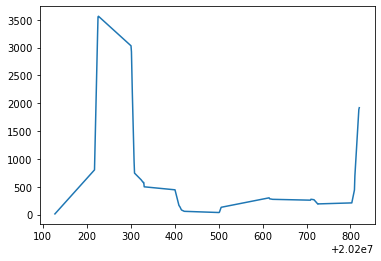

In [517]:
#정치분야 뉴스 제보후 확진자 증가량 추이
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(df_filter_section_politics_values_sort['date'],df_filter_section_politics_values_sort['change_count'])

In [518]:
#사회분야 증가량추이 
change = []
for i in df_filter_section_society_sort.date:
    change.append(confirmed_num(i))
print(change)    

[274.0, 274.0, 2548.0, 2570.0, 624.0, 622.0, 12.0, 1887.0, 3031.0, 2185.0, 533.0, 186.0, 2548.0, 258.0, 2185.0, 649.0, 802.0, 273.0, 73.0, 1562.0, 152.0, 1904.0, 274.0, None, 2075.0, 258.0, 302.0, 274.0, 2922.0, None, 661.0, 2903.0, 258.0, 268.0, 258.0, 183.0, None, nan, None, 186.0, 1288.0, 258.0, 274.0, 404.0, 2002.0, 5.0, 228.0, 9.0, 2548.0, 673.0, 47.0, 12.0, 566.0, 802.0, 802.0, 269.0, 2922.0, 186.0, 9.0, 274.0, 1562.0, 254.0, 641.0, 258.0, 624.0, 1562.0, 258.0, 624.0, 573.0, 2548.0, 572.0, 649.0, 926.0, 2548.0, 286.0, 644.0, 267.0, 5.0, 141.0, 573.0, 584.0, 203.0, 3031.0, 273.0, None, 661.0, 258.0, 274.0, 1884.0, 2548.0, None, nan, 258.0, 54.0, 926.0, 1.0, 2548.0, None, 2903.0, 1684.0, 2903.0, 2903.0, 1904.0, 1631.0, 294.0, 311.0, 183.0, 9.0, 1904.0, 273.0, 3562.0, 266.0, 2001.0, 1904.0, 1884.0, 2903.0, 12.0, 271.0, 2548.0, 649.0, 3031.0, 268.0, 243.0, 332.0, 2548.0, 1157.0, 673.0, 152.0, 3134.0, 258.0, 641.0, 361.0, 646.0, 49.0, 258.0, 1904.0, 294.0, 300.0, 258.0, 744.0, 258.0, 

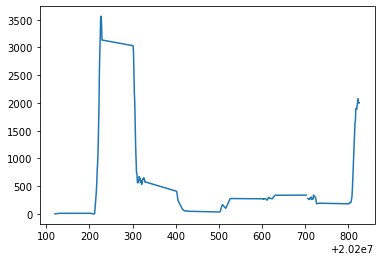

In [521]:
df_filter_section_society_sort['change_count'] = change
#시간순으로 정렬
df_filter_section_society_values_sort =df_filter_section_society_sort.sort_values(by='date',ascending=True)
df_filter_section_society_values_sort.dropna()

#사회분야 뉴스 제보후 확진자 증가량 그래프
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(df_filter_section_society_values_sort['date'],df_filter_section_society_values_sort['change_count'])

In [522]:
#경제분야
change = []
for i in df_filter_section_economy_sort.date:
    change.append(confirmed_num(i))
print(change)

[290.0, 1989.0, 280.0, 3235.0, 76.0, 257.0, 229.0, 294.0, 2001.0, 646.0, 55.0, 2002.0, 1919.0, 186.0, 119.0, 203.0, 314.0, 744.0, 265.0, None, 661.0, 2903.0, 855.0, 275.0, 576.0, None, 581.0, 251.0, nan, 2548.0, 3031.0, 11.0, 1884.0, 176.0, 287.0, 12.0, 1288.0, 3235.0, 294.0, 3134.0, 565.0, nan, 342.0, 183.0, 1904.0, 183.0, 104.0, 232.0, 129.0, 129.0, 3031.0]


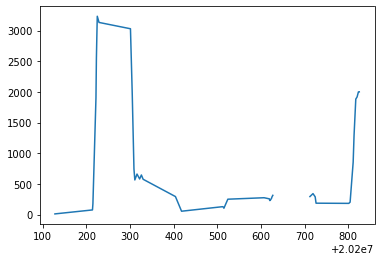

In [523]:
df_filter_section_economy_sort['change_count'] = change
#시간순으로 정렬
df_filter_section_economy_values_sort =df_filter_section_economy_sort.sort_values(by='date',ascending=True)
df_filter_section_economy_values_sort.dropna()

#사회분야 뉴스 제보후 확진자 증가량 그래프
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(df_filter_section_economy_values_sort['date'],df_filter_section_economy_values_sort['change_count'])

In [525]:
# 청와대 뉴스 
df_filter_view2_sort
change = []
for i in df_filter_view2_sort.date:
    change.append(confirmed_num(i))
print(change)

[12.0, 12.0, 744.0, 5.0, 1157.0, 2548.0, 3562.0, 279.0, 3429.0, 3551.0, 1562.0, 1562.0, 2036.0, 3031.0, 361.0, 215.0, 215.0, 3235.0, 1989.0, 2570.0, 11.0, 1585.0, 1585.0, 10.0, 9.0, 544.0, 2.0, 2570.0, None, 661.0, 3235.0, 3235.0, 3031.0, 115.0, 1585.0, 622.0, 294.0, 10.0, 11.0, 2002.0, 926.0, 286.0, 565.0, 544.0, 2570.0, 2922.0, 952.0, 143.0, 3562.0, 3.0, 744.0, 3031.0, 3429.0, 3551.0, None, 723.0, 646.0, 644.0, 12.0, 3551.0, 1212.0, 624.0, 191.0, 110.0, 3429.0, 1631.0, 1157.0, 2.0, 2.0, 56.0, 544.0, 92.0, 12.0, 2570.0, 441.0, 3562.0, 265.0, 12.0, 1157.0, 576.0, 2036.0, 119.0, 544.0, 641.0, 3235.0, 3551.0, 268.0, 3562.0, 1585.0, 2570.0, 1904.0, 2903.0, 11.0, 565.0, 586.0, 9.0, 2034.0, 1157.0, 573.0, 227.0, 55.0, 168.0, 3562.0, 3031.0, 641.0, 12.0, 12.0, 334.0, 692.0, None, 287.0, 1562.0, 12.0, 23.0, 12.0, 498.0, 340.0, 124.0]


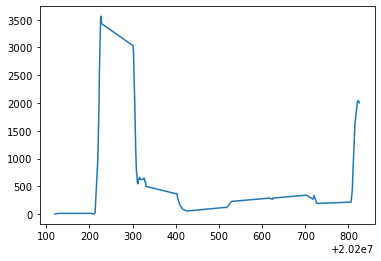

In [526]:
df_filter_view2_sort['change_count'] = change
#시간순으로 정렬
df_filter_view2_values_sort =df_filter_view2_sort.sort_values(by='date',ascending=True)
df_filter_view2_values_sort.dropna()

#사회분야 뉴스 제보후 확진자 증가량 그래프
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(df_filter_view2_values_sort['date'],df_filter_view2_values_sort['change_count'])